In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import cv2

from random import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.cluster import KMeans

from xgboost import XGBClassifier

In [2]:
def label_img(img):
    word_label = img.split('.')[0]
    if word_label == 'dog' : return 1
    elif word_label == 'cat' : return 0

In [3]:
train_data = []
train_label = []
for img in os.listdir(r'C:\Users\guyit\Desktop\train'):
    label = label_img(img)
    path = os.path.join(r'C:\Users\guyit\Desktop\train',img)
    img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(28,28))
    train_data.append(np.array(img).flatten())
    train_label.append(label)

In [4]:
cols = []
for i in range(784):
    cols.append("pixel_"+str(i))
df = pd.DataFrame(train_data,columns=cols)
df['label']=train_label
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,173,187,197,204,209,215,184,165,143,96,...,28,4,9,34,28,9,2,3,3,0
1,36,44,41,40,41,53,67,64,62,73,...,62,26,33,71,53,87,57,52,42,0
2,56,58,62,61,56,50,48,43,48,56,...,106,147,63,76,68,72,131,145,172,0
3,222,236,226,228,231,223,231,224,216,208,...,159,178,255,251,237,223,208,209,212,0
4,99,82,145,198,222,237,202,236,85,136,...,92,97,92,86,86,85,76,85,79,0


In [5]:
df_suffled = df.sample(frac=1,random_state=0)
df_suffled

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
14149,55,47,72,98,137,72,68,155,133,159,...,126,192,179,151,179,101,128,152,109,1
8946,65,60,60,58,58,47,50,54,42,43,...,57,45,23,45,44,61,64,27,36,0
22378,185,206,207,211,210,159,199,195,166,190,...,46,51,57,53,46,41,50,36,23,1
12162,36,140,142,142,140,132,151,56,61,80,...,138,72,48,80,37,60,44,66,70,0
4879,133,146,141,120,138,134,141,123,125,118,...,126,95,76,46,64,75,103,89,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,85,73,77,72,100,43,42,49,44,53,...,84,123,196,70,69,63,52,49,53,1
19648,131,166,138,124,142,126,130,134,132,138,...,122,118,108,140,137,122,91,95,128,1
9845,123,127,126,128,129,130,132,132,130,129,...,107,106,104,96,94,106,57,84,51,0
10799,52,42,40,44,48,53,57,65,73,86,...,25,31,41,32,29,52,69,152,156,0


In [6]:
test = df_suffled.iloc[:5000]
test.reset_index(drop=True,inplace=True)
test.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,55,47,72,98,137,72,68,155,133,159,...,126,192,179,151,179,101,128,152,109,1
1,65,60,60,58,58,47,50,54,42,43,...,57,45,23,45,44,61,64,27,36,0
2,185,206,207,211,210,159,199,195,166,190,...,46,51,57,53,46,41,50,36,23,1
3,36,140,142,142,140,132,151,56,61,80,...,138,72,48,80,37,60,44,66,70,0
4,133,146,141,120,138,134,141,123,125,118,...,126,95,76,46,64,75,103,89,100,0


In [7]:
train = df_suffled.iloc[5000:]
train.reset_index(drop=True,inplace=True)
train.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,218,211,212,174,162,138,158,167,148,167,...,183,193,190,193,193,192,191,194,194,0
1,77,98,59,14,66,105,92,111,143,12,...,99,163,196,179,186,76,102,24,66,1
2,90,93,88,80,79,61,50,42,31,38,...,89,84,85,120,146,149,141,80,74,1
3,149,130,149,144,118,144,127,131,136,142,...,196,191,207,201,204,204,190,198,193,1
4,1,1,1,1,13,1,1,1,1,4,...,1,1,1,1,1,1,1,1,1,1


In [8]:
train_data = train.drop('label',axis=1)
train_target = train['label']

In [9]:
test_data = test.drop('label',axis=1)
test_target = test['label']

the labels are:
- 0 cat
- 1 dog

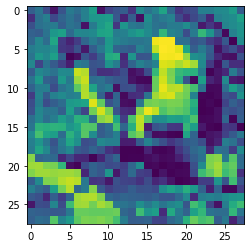

In [56]:
plt.imshow(np.array(train_data.loc[1]).reshape(28,28))

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 785 entries, pixel_0 to label
dtypes: int64(785)
memory usage: 149.7 MB


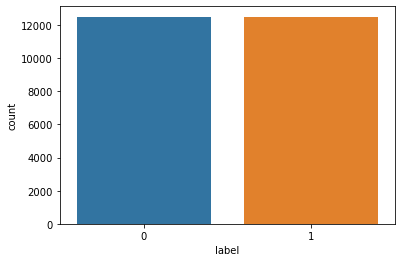

In [27]:
sns.countplot(df['label'])

In [30]:
rfc = RandomForestClassifier()
rfc.fit(train_data,train_target)

RandomForestClassifier()

In [31]:
rfc.feature_importances_

array([0.00102908, 0.00101087, 0.00100481, 0.00106001, 0.00094802,
       0.00098764, 0.00107365, 0.00099128, 0.00112334, 0.00106552,
       0.00113178, 0.00100118, 0.00107346, 0.00105109, 0.00103453,
       0.00093218, 0.00098105, 0.00107452, 0.0010987 , 0.00091831,
       0.00108111, 0.00085721, 0.00112843, 0.00115178, 0.00093942,
       0.00101906, 0.0010446 , 0.00101066, 0.00125167, 0.00108123,
       0.00103013, 0.00099994, 0.00105619, 0.00105582, 0.00108022,
       0.00114558, 0.00098487, 0.00111342, 0.00101656, 0.0011678 ,
       0.00103803, 0.00102527, 0.00114931, 0.00100731, 0.00087724,
       0.00106293, 0.00100045, 0.00111881, 0.00105222, 0.00114584,
       0.00103821, 0.00107881, 0.00091194, 0.00107569, 0.00100201,
       0.00102796, 0.00107997, 0.001093  , 0.00106179, 0.00092164,
       0.00095051, 0.00115433, 0.00102959, 0.00113205, 0.00103514,
       0.00118349, 0.0012036 , 0.00100046, 0.0012218 , 0.00119594,
       0.00100282, 0.00123261, 0.00102704, 0.0010955 , 0.00113

In [32]:
def plot_instance(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = plt.cm.hot,
               interpolation="nearest")
    plt.axis("off")

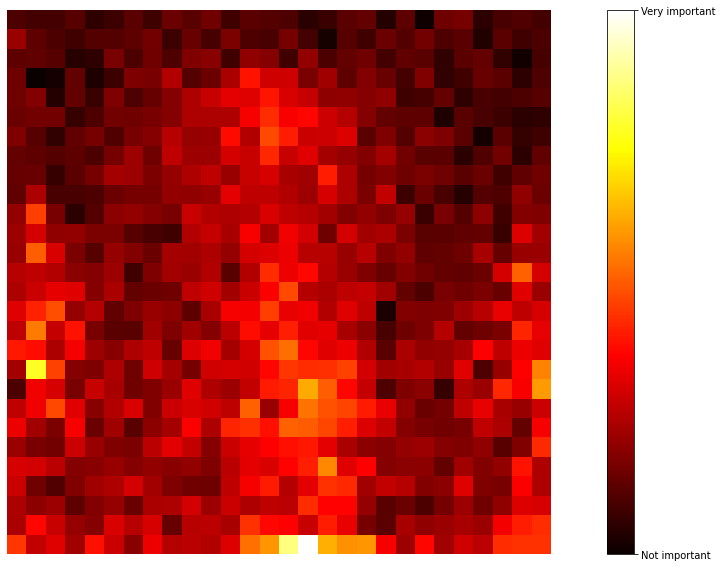

In [33]:
plt.figure(figsize=(20, 10))
plot_instance(rfc.feature_importances_)
cbar = plt.colorbar(ticks=[rfc.feature_importances_.min(), rfc.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

In [34]:
sc= StandardScaler()
scaled_train = sc.fit_transform(train_data)
scaled_test = sc.transform(test_data)

In [35]:
rfc = RandomForestClassifier()
rfc.fit(scaled_train,train_target)
rfc

RandomForestClassifier()

In [36]:
y_pred = rfc.predict(scaled_test)

In [37]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.67      0.64      2496
           1       0.64      0.60      0.62      2504

    accuracy                           0.63      5000
   macro avg       0.63      0.63      0.63      5000
weighted avg       0.63      0.63      0.63      5000



In [39]:
metrics.accuracy_score(test_target,y_pred)

0.6318

Text(33.0, 0.5, 'Actual')

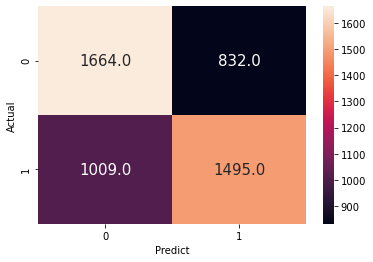

In [40]:
cm = confusion_matrix(test_target,y_pred)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [10]:
train_data_fliped = []
train_label_fliped = []
for img in os.listdir(r'C:\Users\guyit\Desktop\train'):
    label = label_img(img)
    path = os.path.join(r'C:\Users\guyit\Desktop\train',img)
    img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(28,28))
    img = cv2.flip(img,1)
    train_data_fliped.append(np.array(img).flatten())
    train_label_fliped.append(label)

In [11]:
cols = []
for i in range(784):
    cols.append("pixel_"+str(i))
df_fliped = pd.DataFrame(train_data_fliped,columns=cols)
df_fliped['label']=train_label_fliped
df_fliped.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,211,222,227,228,226,224,223,222,222,222,...,45,46,47,48,51,53,127,135,128,0
1,162,103,82,99,91,104,87,93,101,131,...,94,35,36,20,21,20,20,22,18,0
2,155,148,158,154,155,154,146,156,144,156,...,65,99,178,189,199,143,117,151,153,0
3,242,236,240,220,227,210,208,226,227,225,...,96,98,93,98,114,129,151,207,208,0
4,75,51,13,35,102,160,165,174,78,96,...,117,64,85,141,81,81,72,60,56,0


In [12]:
df_fliped_shuffled = df_fliped.sample(frac=1,random_state=0)
df_fliped_shuffled.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
14149,87,122,99,87,92,101,37,31,68,94,...,152,157,168,155,133,168,165,79,129,1
8946,89,115,116,104,120,170,253,241,204,126,...,222,222,222,222,221,221,221,221,221,0
22378,232,252,212,205,251,192,246,224,252,225,...,53,52,52,52,50,44,44,41,50,1
12162,95,146,98,144,145,105,142,150,66,93,...,47,45,55,51,65,77,54,64,84,0
4879,92,92,85,86,92,88,132,140,103,102,...,137,138,131,111,108,105,94,87,117,0


In [13]:
train_fliped = df_fliped_shuffled.iloc[5000:]
train_fliped.reset_index(drop=True,inplace=True)
train_fliped.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,134,124,124,126,125,109,111,106,74,98,...,174,164,160,159,172,158,147,150,148,0
1,74,141,123,120,110,110,60,54,39,85,...,202,204,191,137,115,188,87,91,77,1
2,39,43,42,43,45,44,41,41,36,37,...,85,77,80,90,83,89,84,85,78,1
3,45,111,104,144,82,92,100,105,108,109,...,186,127,153,133,187,175,128,186,174,1
4,1,1,1,1,1,1,1,1,1,1,...,80,55,42,42,0,1,1,1,1,1


In [14]:
train_fliped_data = train_fliped.drop('label',axis=1)
train_fliped_target = train_fliped['label']

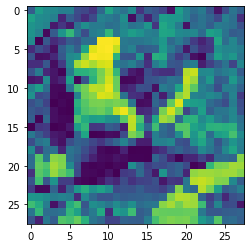

In [62]:
plt.imshow(np.array(train_fliped_data.loc[1]).reshape(28,28))

In [15]:
full_train_data = pd.concat([train_data,train_fliped_data])
full_train_target = pd.concat([train_target,train_fliped_target])

In [16]:
sc= StandardScaler()
scaled_train = sc.fit_transform(full_train_data)
scaled_test = sc.transform(test_data)

In [65]:
rfc = RandomForestClassifier()
rfc.fit(scaled_train,full_train_target)
rfc

RandomForestClassifier()

In [66]:
y_pred = rfc.predict(scaled_test)

In [67]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.67      0.65      2496
           1       0.65      0.62      0.64      2504

    accuracy                           0.64      5000
   macro avg       0.65      0.64      0.64      5000
weighted avg       0.65      0.64      0.64      5000



In [68]:
metrics.accuracy_score(test_target,y_pred)

0.6448

Text(33.0, 0.5, 'Actual')

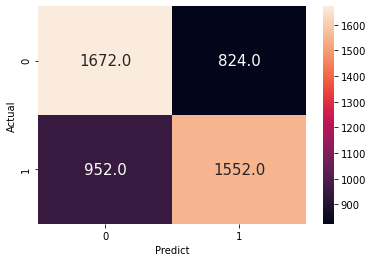

In [69]:
cm = confusion_matrix(test_target,y_pred)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [70]:
xg = XGBClassifier(use_label_encoder=False,eval_metric = 'mlogloss')
xg.fit(scaled_train,full_train_target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [71]:
y_pred = xg.predict(scaled_test)

In [72]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.67      0.68      2496
           1       0.68      0.69      0.68      2504

    accuracy                           0.68      5000
   macro avg       0.68      0.68      0.68      5000
weighted avg       0.68      0.68      0.68      5000



In [73]:
metrics.accuracy_score(test_target,y_pred)

0.6798

Text(33.0, 0.5, 'Actual')

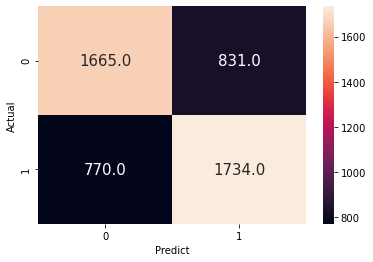

In [74]:
cm = confusion_matrix(test_target,y_pred)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [77]:
xg = XGBClassifier(use_label_encoder=False,eval_metric = 'mlogloss')
rfc = RandomForestClassifier()
vot = VotingClassifier(estimators=[('xg',xg),('rfc',rfc)],voting='soft')
vot.fit(scaled_train,full_train_target)

VotingClassifier(estimators=[('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            eval_metric='mlogloss', gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
             

In [78]:
y_pred = vot.predict(scaled_test)

In [79]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.68      0.68      2496
           1       0.68      0.70      0.69      2504

    accuracy                           0.69      5000
   macro avg       0.69      0.69      0.69      5000
weighted avg       0.69      0.69      0.69      5000



In [80]:
metrics.accuracy_score(test_target,y_pred)

0.6866

Text(33.0, 0.5, 'Actual')

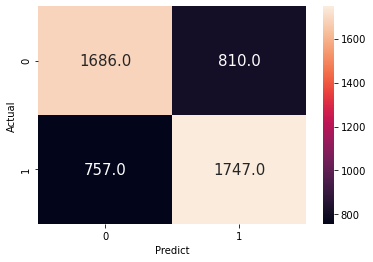

In [81]:
cm = confusion_matrix(test_target,y_pred)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [69]:
km = KMeans(n_clusters = 2, random_state=0)
km.fit(full_train_data)
y_labels_train = km.labels_
y_labels_test = km.predict(test_data)

In [70]:
full_train_data_km = full_train_data.copy()
full_train_data_km['KMeans'] = y_labels_train
full_train_data_km.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,KMeans
0,218,211,212,174,162,138,158,167,148,167,...,183,193,190,193,193,192,191,194,194,1
1,77,98,59,14,66,105,92,111,143,12,...,99,163,196,179,186,76,102,24,66,0
2,90,93,88,80,79,61,50,42,31,38,...,89,84,85,120,146,149,141,80,74,0
3,149,130,149,144,118,144,127,131,136,142,...,196,191,207,201,204,204,190,198,193,1
4,1,1,1,1,13,1,1,1,1,4,...,1,1,1,1,1,1,1,1,1,0


In [71]:
test_data_km = test_data.copy()
test_data_km['KMeans'] = y_labels_test

In [72]:
xg = XGBClassifier(use_label_encoder=False,eval_metric = 'mlogloss')
rfc = RandomForestClassifier()
pipe_rfc = Pipeline(steps=[('sc',sc), ('rfc', rfc)])
pipe_xg =  Pipeline(steps=[('sc',sc), ('xg', xg)])
vot = VotingClassifier(estimators=[('xg',pipe_xg),('rfc',pipe_rfc)],voting='soft')
vot.fit(full_train_data_km,full_train_target)

VotingClassifier(estimators=[('xg',
                              Pipeline(steps=[('sc', StandardScaler()),
                                              ('xg',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             eval_metric='mlogloss',
                                                             gamma=None,
                                                             gpu_id=None,
                                                             importance_type='gain',
                                                             interaction_constraints=None,
                         

In [73]:
y_pred = vot.predict(test_data_km)

In [74]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.68      0.68      2496
           1       0.68      0.69      0.69      2504

    accuracy                           0.69      5000
   macro avg       0.69      0.68      0.68      5000
weighted avg       0.69      0.69      0.68      5000



In [75]:
metrics.accuracy_score(test_target,y_pred)

0.685

Text(33.0, 0.5, 'Actual')

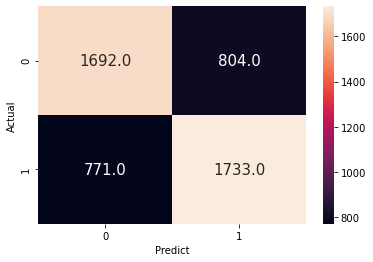

In [76]:
cm = confusion_matrix(test_target,y_pred)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [84]:
pca = PCA()
pca.fit(scaled_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.9) + 1

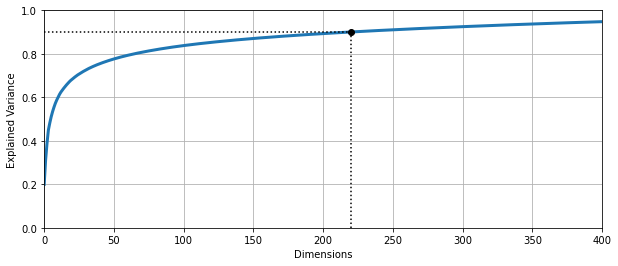

In [85]:
plt.figure(figsize=(10,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.9], "k:")
plt.plot([0, d], [0.9, 0.9], "k:")
plt.plot(d, 0.9, "ko")
plt.grid(True)
plt.show()

In [17]:
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
xg = XGBClassifier(use_label_encoder=False,eval_metric = 'mlogloss')
pca = PCA(n_components=0.9)

In [18]:
redueced_train = pca.fit_transform(scaled_train)
redueced_train.shape

(40000, 220)

In [19]:
redueced_test = pca.transform(scaled_test)
redueced_test.shape

(5000, 220)

In [89]:
pipe_knn = Pipeline(steps=[('sc',sc),('pca', pca), ('knn', knn)])
pipe_dtc = Pipeline(steps=[('sc',sc),('pca', pca), ('dtc', dtc)])
pipe_rfc = Pipeline(steps=[('sc',sc),('pca', pca), ('rfc', rfc)])
pipe_xg = Pipeline(steps=[('sc',sc),('pca', pca), ('xg', xg)])

In [90]:
param_knn = {
    'knn__n_neighbors': list(range(2,11,2)),
    'knn__weights': ['uniform','distance']  
}

In [92]:
path = dtc.cost_complexity_pruning_path(redueced_train,full_train_target)
alphas = path.ccp_alphas
param_dtc = {'dtc__ccp_alpha':alphas}

In [93]:
param_rfc = {'rfc__n_estimators':[100,200,300,400,500],
    'rfc__max_depth' : list(range(2,21,2))}

In [109]:
param_xg = {'xg__n_estimators':[100,200,300,400,500],
    'xg__learning_rate' : np.linspace(0.3,1,8)}

In [110]:
grid_knn = RandomizedSearchCV(pipe_knn,param_knn,scoring='accuracy')
grid_dtc = RandomizedSearchCV(pipe_dtc,param_dtc,scoring='accuracy')
grid_rfc = RandomizedSearchCV(pipe_rfc,param_rfc,scoring='accuracy')
grid_xg = RandomizedSearchCV(pipe_xg,param_xg,scoring='accuracy')

In [96]:
grid_knn.fit(full_train_data,full_train_target)

RandomizedSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()),
                                             ('pca', PCA(n_components=0.9)),
                                             ('knn', KNeighborsClassifier())]),
                   param_distributions={'knn__n_neighbors': [2, 4, 6, 8, 10],
                                        'knn__weights': ['uniform',
                                                         'distance']},
                   scoring='accuracy')

In [97]:
grid_dtc.fit(full_train_data,full_train_target)

RandomizedSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()),
                                             ('pca', PCA(n_components=0.9)),
                                             ('dtc',
                                              DecisionTreeClassifier())]),
                   param_distributions={'dtc__ccp_alpha': array([0.00000000e+00, 2.47863248e-05, 2.47881356e-05, ...,
       3.10367540e-03, 4.22521443e-03, 6.48858291e-03])},
                   scoring='accuracy')

In [98]:
grid_rfc.fit(full_train_data,full_train_target)

RandomizedSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()),
                                             ('pca', PCA(n_components=0.9)),
                                             ('rfc',
                                              RandomForestClassifier())]),
                   param_distributions={'rfc__max_depth': [2, 4, 6, 8, 10, 12,
                                                           14, 16, 18, 20],
                                        'rfc__n_estimators': [100, 200, 300,
                                                              400, 500]},
                   scoring='accuracy')

In [111]:
grid_xg.fit(full_train_data,full_train_target)

RandomizedSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()),
                                             ('pca', PCA(n_components=0.9)),
                                             ('xg',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            eval_metric='mlogloss',
                                                            gamma=None,
                                                            gpu_id=None,
                                                            importance_type='gain',
                                                            interaction_constraints=No

In [99]:
print(grid_knn.best_params_)
print(grid_knn.best_score_)

{'knn__weights': 'distance', 'knn__n_neighbors': 10}
0.605725


In [100]:
print(grid_dtc.best_params_)
print(grid_dtc.best_score_)

{'dtc__ccp_alpha': 0.0002}
0.611


In [101]:
print(grid_rfc.best_params_)
print(grid_rfc.best_score_)

{'rfc__n_estimators': 400, 'rfc__max_depth': 14}
0.6604249999999999


In [112]:
print(grid_xg.best_params_)
print(grid_xg.best_score_)

{'xg__n_estimators': 500, 'xg__learning_rate': 0.6}
0.6979249999999999


In [20]:
knn = KNeighborsClassifier(n_neighbors=10,weights='distance')
dtc = DecisionTreeClassifier(ccp_alpha= 0.0002)
rfc = RandomForestClassifier(n_estimators=400,max_depth=14)
xg = XGBClassifier(use_label_encoder=False,eval_metric = 'mlogloss',n_estimators=500,learning_rate=0.6)
pipe_rfc = Pipeline(steps=[('sc',sc),('pca', pca), ('rfc', rfc)])
pipe_knn = Pipeline(steps=[('sc',sc),('pca', pca), ('knn', knn)])
pipe_dtc = Pipeline(steps=[('sc',sc),('pca', pca), ('dtc', dtc)])
pipe_xg =  Pipeline(steps=[('sc',sc),('pca', pca), ('xg', xg)])

In [125]:
vot = VotingClassifier(estimators=[('dtc', pipe_dtc), ('knn', pipe_knn), ('rfc', pipe_rfc), ('xg', pipe_xg)],
voting='soft')

In [127]:
vot.fit(full_train_data,full_train_target)

VotingClassifier(estimators=[('dtc',
                              Pipeline(steps=[('sc', StandardScaler()),
                                              ('pca', PCA(n_components=0.9)),
                                              ('dtc',
                                               DecisionTreeClassifier(ccp_alpha=0.0002))])),
                             ('knn',
                              Pipeline(steps=[('sc', StandardScaler()),
                                              ('pca', PCA(n_components=0.9)),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=10,
                                                                    weights='distance'))])),
                             ('rfc',
                              Pipeline(steps=[('sc', StandardScaler()),
                                              (...
                                                             learning_rate=0.6,
        

In [128]:
y_pred = vot.predict(test_data)

In [130]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64      2496
           1       0.64      0.62      0.63      2504

    accuracy                           0.64      5000
   macro avg       0.64      0.64      0.64      5000
weighted avg       0.64      0.64      0.64      5000



In [129]:
metrics.accuracy_score(test_target,y_pred)

0.6368

In [21]:
vot2 = VotingClassifier(estimators=[('xg',pipe_xg), ('rfc', pipe_rfc)],
voting='soft')

In [138]:
vot2.fit(full_train_data,full_train_target)

VotingClassifier(estimators=[('xg',
                              Pipeline(steps=[('sc', StandardScaler()),
                                              ('pca', PCA(n_components=0.9)),
                                              ('xg',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             eval_metric='mlogloss',
                                                             gamma=None,
                                                             gpu_id=None,
                                                             importance_type='gain',
                                      

In [139]:
y_pred = vot2.predict(test_data)

In [140]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66      2496
           1       0.66      0.65      0.66      2504

    accuracy                           0.66      5000
   macro avg       0.66      0.66      0.66      5000
weighted avg       0.66      0.66      0.66      5000



In [141]:
metrics.accuracy_score(test_target,y_pred)

0.6604

In [77]:
stc = StackingClassifier(estimators=[('dtc', pipe_dtc), ('knn', pipe_knn), ('rfc', pipe_rfc), ('xg', pipe_xg)])

In [143]:
stc.fit(full_train_data,full_train_target)

StackingClassifier(estimators=[('dtc',
                                Pipeline(steps=[('sc', StandardScaler()),
                                                ('pca', PCA(n_components=0.9)),
                                                ('dtc',
                                                 DecisionTreeClassifier(ccp_alpha=0.0002))])),
                               ('knn',
                                Pipeline(steps=[('sc', StandardScaler()),
                                                ('pca', PCA(n_components=0.9)),
                                                ('knn',
                                                 KNeighborsClassifier(n_neighbors=10,
                                                                      weights='distance'))])),
                               ('rfc',
                                Pipeline(steps=[('sc', StandardScaler())...
                                                               interaction_constraints=None,
                  

In [144]:
y_pred = stc.predict(test_data)

In [145]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      2496
           1       0.67      0.67      0.67      2504

    accuracy                           0.67      5000
   macro avg       0.67      0.67      0.67      5000
weighted avg       0.67      0.67      0.67      5000



In [146]:
metrics.accuracy_score(test_target,y_pred)

0.667

In [149]:
stc2 = StackingClassifier(estimators=[('xg', pipe_xg), ('rfc', pipe_rfc)])

In [150]:
stc2.fit(full_train_data,full_train_target)

StackingClassifier(estimators=[('xg',
                                Pipeline(steps=[('sc', StandardScaler()),
                                                ('pca', PCA(n_components=0.9)),
                                                ('xg',
                                                 XGBClassifier(base_score=None,
                                                               booster=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               eval_metric='mlogloss',
                                                               gamma=None,
                                                               gpu_id=None,
                                                               importance_type='gain',
            

In [151]:
y_pred = stc2.predict(test_data)

In [152]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66      2496
           1       0.67      0.66      0.66      2504

    accuracy                           0.66      5000
   macro avg       0.66      0.66      0.66      5000
weighted avg       0.66      0.66      0.66      5000



In [153]:
metrics.accuracy_score(test_target,y_pred)

0.6628

In [53]:
vot2.fit(full_train_data_km,full_train_target)

VotingClassifier(estimators=[('xg',
                              Pipeline(steps=[('sc', StandardScaler()),
                                              ('pca', PCA(n_components=0.9)),
                                              ('xg',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             eval_metric='mlogloss',
                                                             gamma=None,
                                                             gpu_id=None,
                                                             importance_type='gain',
                                      

In [54]:
y_pred = vot2.predict(test_data_km)

In [55]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      2496
           1       0.67      0.67      0.67      2504

    accuracy                           0.67      5000
   macro avg       0.67      0.67      0.67      5000
weighted avg       0.67      0.67      0.67      5000



In [56]:
metrics.accuracy_score(test_target,y_pred)

0.6668

In [78]:
stc.fit(full_train_data_km,full_train_target)

StackingClassifier(estimators=[('dtc',
                                Pipeline(steps=[('sc', StandardScaler()),
                                                ('pca', PCA(n_components=0.9)),
                                                ('dtc',
                                                 DecisionTreeClassifier(ccp_alpha=0.0002))])),
                               ('knn',
                                Pipeline(steps=[('sc', StandardScaler()),
                                                ('pca', PCA(n_components=0.9)),
                                                ('knn',
                                                 KNeighborsClassifier(n_neighbors=10,
                                                                      weights='distance'))])),
                               ('rfc',
                                Pipeline(steps=[('sc', StandardScaler())...
                                                               interaction_constraints=None,
                  

In [79]:
y_pred = stc.predict(test_data_km)

In [80]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.66      0.67      2496
           1       0.67      0.68      0.67      2504

    accuracy                           0.67      5000
   macro avg       0.67      0.67      0.67      5000
weighted avg       0.67      0.67      0.67      5000



In [81]:
metrics.accuracy_score(test_target,y_pred)

0.6692

# Second try

In [6]:
train_data = []
train_label = []
for img in os.listdir(r'C:\Users\anitay\Desktop\Ors folder\train'):
    label = label_img(img)
    path = os.path.join(r'C:\Users\anitay\Desktop\Ors folder\train',img)
    img = cv2.resize(cv2.imread(path),(50,50))
    train_data.append(np.array(img).flatten())
    train_label.append(label)

In [7]:
cols = []
for i in range(7500):
    cols.append("pixel_"+str(i))
df2 = pd.DataFrame(train_data,columns=cols)
df2['label']=train_label
df2

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_7491,pixel_7492,pixel_7493,pixel_7494,pixel_7495,pixel_7496,pixel_7497,pixel_7498,pixel_7499,label
0,92,169,208,100,177,216,104,182,225,110,...,0,2,2,0,2,2,0,2,2,0
1,43,43,39,64,58,55,36,40,35,44,...,47,53,70,52,57,75,20,26,39,0
2,53,45,38,61,47,41,64,54,47,69,...,52,150,165,2,183,185,10,183,187,0
3,217,222,221,220,225,224,237,235,235,239,...,208,210,210,218,220,219,207,212,215,0
4,72,109,137,83,120,148,48,87,115,90,...,82,105,120,59,91,102,64,90,102,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,107,144,148,110,147,151,113,150,154,114,...,132,168,178,134,169,179,135,170,180,1
24996,53,81,111,63,88,114,44,76,95,43,...,50,76,99,66,97,118,37,64,85,1
24997,45,48,53,50,53,58,51,53,54,41,...,134,175,213,27,76,117,126,171,217,1
24998,253,252,253,229,230,253,175,189,235,92,...,98,98,114,97,95,110,107,107,121,1


In [ ]:
df2.to_csv(r'C:\Users\anitay\Desktop\Ors folder\cnd.csv',index=False)

In [2]:
df2 = pd.read_csv(r'C:\Users\anitay\Desktop\Ors folder\cnd.csv')

In [3]:
df2.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_7491,pixel_7492,pixel_7493,pixel_7494,pixel_7495,pixel_7496,pixel_7497,pixel_7498,pixel_7499,label
0,92,169,208,100,177,216,104,182,225,110,...,0,2,2,0,2,2,0,2,2,0
1,43,43,39,64,58,55,36,40,35,44,...,47,53,70,52,57,75,20,26,39,0
2,53,45,38,61,47,41,64,54,47,69,...,52,150,165,2,183,185,10,183,187,0
3,217,222,221,220,225,224,237,235,235,239,...,208,210,210,218,220,219,207,212,215,0
4,72,109,137,83,120,148,48,87,115,90,...,82,105,120,59,91,102,64,90,102,0


In [4]:
df2_suffled = df2.sample(frac=1,random_state=0)
df2_suffled

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_7491,pixel_7492,pixel_7493,pixel_7494,pixel_7495,pixel_7496,pixel_7497,pixel_7498,pixel_7499,label
14149,43,80,42,30,82,41,28,76,47,19,...,87,156,101,66,142,106,64,114,76,1
8946,20,58,120,4,53,119,6,51,119,3,...,77,71,72,75,72,68,70,74,69,0
22378,182,186,187,187,188,191,202,202,202,207,...,35,41,36,32,37,35,19,24,22,1
12162,24,31,42,34,55,86,104,135,160,106,...,88,95,120,70,75,95,93,98,112,0
4879,110,126,149,114,130,152,113,134,156,108,...,23,77,137,37,91,151,32,86,146,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,88,92,84,83,85,91,79,75,71,102,...,22,60,30,32,65,38,29,55,29,1
19648,129,125,130,131,125,136,166,161,170,136,...,90,104,116,124,133,146,133,141,158,1
9845,114,119,134,116,121,136,119,124,139,117,...,52,51,61,41,40,50,47,46,55,0
10799,45,56,54,41,52,50,33,43,42,28,...,163,161,157,160,160,154,153,146,143,0


In [5]:
test = df2_suffled.iloc[:5000]
test.reset_index(drop=True,inplace=True)
test.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_7491,pixel_7492,pixel_7493,pixel_7494,pixel_7495,pixel_7496,pixel_7497,pixel_7498,pixel_7499,label
0,43,80,42,30,82,41,28,76,47,19,...,87,156,101,66,142,106,64,114,76,1
1,20,58,120,4,53,119,6,51,119,3,...,77,71,72,75,72,68,70,74,69,0
2,182,186,187,187,188,191,202,202,202,207,...,35,41,36,32,37,35,19,24,22,1
3,24,31,42,34,55,86,104,135,160,106,...,88,95,120,70,75,95,93,98,112,0
4,110,126,149,114,130,152,113,134,156,108,...,23,77,137,37,91,151,32,86,146,0


In [6]:
train = df2_suffled.iloc[5000:]
train.reset_index(drop=True,inplace=True)
train.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_7491,pixel_7492,pixel_7493,pixel_7494,pixel_7495,pixel_7496,pixel_7497,pixel_7498,pixel_7499,label
0,218,227,187,224,235,195,214,227,189,203,...,204,208,159,205,209,160,202,206,157,0
1,50,70,67,48,78,73,56,98,87,64,...,43,53,83,11,29,59,38,63,97,1
2,113,94,77,110,91,74,117,98,81,108,...,55,60,85,59,57,87,61,65,97,1
3,134,146,152,125,137,143,130,138,145,144,...,194,198,203,204,207,211,191,193,201,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [7]:
train_data = train.drop('label',axis=1)
train_target = train['label']

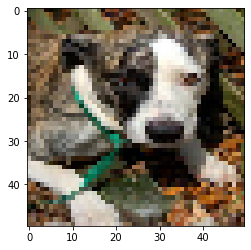

In [8]:
plt.imshow(np.flip(np.array(train_data.loc[1]).reshape(50,50,3),2))

In [8]:
test_data = test.drop('label',axis=1)
test_target = test['label']

In [28]:
sc= StandardScaler()
scaled_train = sc.fit_transform(train_data)
scaled_test = sc.transform(test_data)

In [34]:
rfc = RandomForestClassifier()
rfc.fit(scaled_train,train_target)
rfc

RandomForestClassifier()

In [35]:
y_pred = rfc.predict(scaled_test)

In [36]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.70      0.67      2496
           1       0.67      0.62      0.64      2504

    accuracy                           0.66      5000
   macro avg       0.66      0.66      0.66      5000
weighted avg       0.66      0.66      0.66      5000



In [37]:
metrics.accuracy_score(test_target,y_pred)

0.6586

Text(33.0, 0.5, 'Actual')

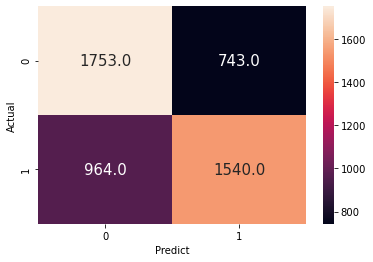

In [44]:
cm = confusion_matrix(test_target,y_pred)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [13]:
train_data_fliped = []
train_label_fliped = []
for img in os.listdir(r'C:\Users\anitay\Desktop\Ors folder\train'):
    label = label_img(img)
    path = os.path.join(r'C:\Users\anitay\Desktop\Ors folder\train',img)
    img = cv2.resize(cv2.imread(path),(50,50))
    img = cv2.flip(img,1)
    train_data_fliped.append(np.array(img).flatten())
    train_label_fliped.append(label)

In [15]:
cols = []
for i in range(7500):
    cols.append("pixel_"+str(i))
df2_fliped = pd.DataFrame(train_data_fliped,columns=cols)
df2_fliped['label']=train_label_fliped
df2_fliped

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_7491,pixel_7492,pixel_7493,pixel_7494,pixel_7495,pixel_7496,pixel_7497,pixel_7498,pixel_7499,label
0,122,204,245,133,212,247,146,219,249,155,...,60,132,166,62,129,160,57,124,155,0
1,167,195,199,107,93,88,121,95,88,116,...,20,18,20,22,21,23,23,22,24,0
2,159,163,131,150,158,129,157,158,124,162,...,97,132,146,106,143,157,111,155,168,0
3,241,236,235,250,245,244,232,230,229,232,...,202,199,211,202,195,206,213,209,211,0
4,68,87,130,26,55,116,0,15,73,57,...,39,56,65,44,57,65,46,56,63,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,155,190,200,155,190,200,154,189,199,153,...,48,71,73,48,71,73,47,70,72,1
24996,35,74,88,47,116,113,38,79,102,93,...,50,78,102,68,94,110,54,77,100,1
24997,60,68,75,61,70,77,54,57,62,47,...,71,91,120,96,142,167,47,70,94,1
24998,240,248,253,228,232,255,215,235,244,208,...,74,79,94,74,79,94,80,84,99,1


In [16]:
df2_fliped.to_csv(r'C:\Users\anitay\Desktop\Ors folder\mirror.csv',index=False)

In [9]:
df2_fliped = pd.read_csv(r'C:\Users\anitay\Desktop\Ors folder\mirror.csv')

In [10]:
df2_fliped_shuffled = df2_fliped.sample(frac=1,random_state=0)
df2_fliped_shuffled.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_7491,pixel_7492,pixel_7493,pixel_7494,pixel_7495,pixel_7496,pixel_7497,pixel_7498,pixel_7499,label
14149,70,131,87,67,116,80,49,106,71,178,...,32,88,57,50,138,82,110,175,127,1
8946,128,105,60,129,104,63,138,120,82,145,...,210,220,227,210,221,225,210,221,225,0
22378,247,238,238,236,226,226,254,254,253,246,...,45,51,46,39,51,45,40,52,46,1
12162,85,100,118,108,135,158,74,88,90,27,...,41,50,63,52,69,88,60,72,92,0
4879,67,90,104,67,90,104,67,90,105,72,...,22,74,141,42,94,161,43,95,162,0


In [11]:
train_fliped = df2_fliped_shuffled.iloc[5000:]
train_fliped.reset_index(drop=True,inplace=True)
train_fliped.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_7491,pixel_7492,pixel_7493,pixel_7494,pixel_7495,pixel_7496,pixel_7497,pixel_7498,pixel_7499,label
0,105,123,109,135,154,140,114,138,126,114,...,178,174,96,175,170,92,175,172,91,0
1,20,72,70,6,35,40,87,128,132,71,...,83,102,135,55,80,118,65,84,111,1
2,37,41,36,39,43,38,39,43,38,37,...,69,91,96,61,83,88,57,79,84,1
3,22,35,43,84,104,115,91,116,134,93,...,161,182,191,141,166,168,93,127,121,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [12]:
train_fliped_data = train_fliped.drop('label',axis=1)
train_fliped_target = train_fliped['label']

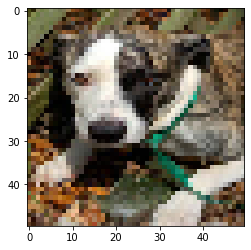

In [23]:
plt.imshow(np.flip(np.array(train_fliped_data.loc[1]).reshape(50,50,3),2))

In [13]:
full_train_data = pd.concat([train_data,train_fliped_data])

In [14]:
full_train_target = pd.concat([train_target,train_fliped_target])

In [15]:
sc= StandardScaler()
scaled_train = sc.fit_transform(full_train_data)
scaled_test = sc.transform(test_data)

In [29]:
rfc = RandomForestClassifier()
rfc.fit(scaled_train,full_train_target)
rfc

RandomForestClassifier()

In [30]:
y_pred = rfc.predict(scaled_test)

In [31]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.71      0.68      2496
           1       0.69      0.63      0.66      2504

    accuracy                           0.67      5000
   macro avg       0.67      0.67      0.67      5000
weighted avg       0.67      0.67      0.67      5000



In [32]:
metrics.accuracy_score(test_target,y_pred)

0.6702

Text(33.0, 0.5, 'Actual')

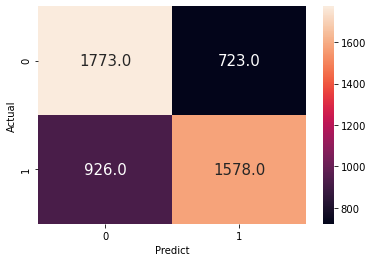

In [33]:
cm = confusion_matrix(test_target,y_pred)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [16]:
xg = XGBClassifier(use_label_encoder=False)
xg.fit(scaled_train,full_train_target)

[02:22:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [17]:
y_pred = xg.predict(scaled_test)

In [18]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      2496
           1       0.70      0.68      0.69      2504

    accuracy                           0.69      5000
   macro avg       0.69      0.69      0.69      5000
weighted avg       0.69      0.69      0.69      5000



In [19]:
metrics.accuracy_score(test_target,y_pred)

0.6948

Text(33.0, 0.5, 'Actual')

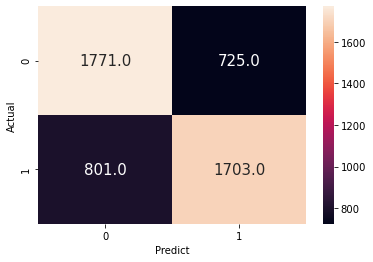

In [20]:
cm = confusion_matrix(test_target,y_pred)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [21]:
xg = XGBClassifier(use_label_encoder=False)
rfc = RandomForestClassifier()
vot = VotingClassifier(estimators=[('xg',xg),('rfc',rfc)],voting='soft')

In [22]:
vot.fit(scaled_train,full_train_target)

[02:30:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, reg_alpha=None,
  

In [23]:
y_pred = vot.predict(scaled_test)

In [24]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      2496
           1       0.70      0.69      0.69      2504

    accuracy                           0.70      5000
   macro avg       0.70      0.70      0.70      5000
weighted avg       0.70      0.70      0.70      5000



In [25]:
metrics.accuracy_score(test_target,y_pred)

0.6976

Text(33.0, 0.5, 'Actual')

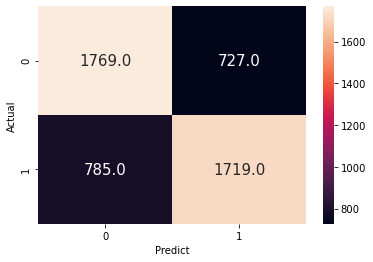

In [26]:
cm = confusion_matrix(test_target,y_pred)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [27]:
pca = PCA()
pca.fit(scaled_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.8) + 1

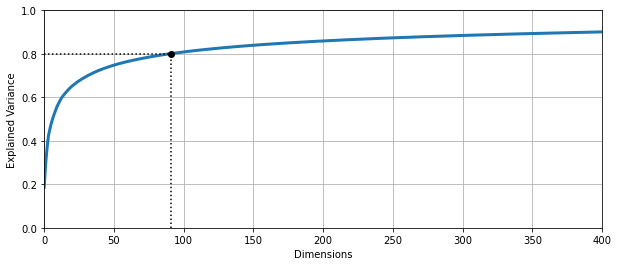

In [28]:
plt.figure(figsize=(10,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.8], "k:")
plt.plot([0, d], [0.8, 0.8], "k:")
plt.plot(d, 0.8, "ko")
plt.grid(True)
plt.show()

In [29]:
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
pca = PCA(n_components=0.8)

In [30]:
redueced_train = pca.fit_transform(scaled_train)
redueced_train.shape

(40000, 91)

In [31]:
redueced_test = pca.transform(scaled_test)
redueced_test.shape

(5000, 91)

In [32]:
xg = XGBClassifier(use_label_encoder=False,eval_metric='logloss')
xg.fit(redueced_train,full_train_target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [33]:
y_pred = xg.predict(redueced_test)

In [34]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65      2496
           1       0.65      0.66      0.65      2504

    accuracy                           0.65      5000
   macro avg       0.65      0.65      0.65      5000
weighted avg       0.65      0.65      0.65      5000



In [35]:
metrics.accuracy_score(test_target,y_pred)

0.649

In [ ]:
param_knn = {
    'knn__n_neighbors': list(range(2,11,2)),
    'knn__weights': ['uniform','distance']  
}

In [ ]:
path = dtc.cost_complexity_pruning_path(redueced_train,y_train)
alphas = path.ccp_alphas
param_dtc = {'dtc__ccp_alpha':alphas}

In [ ]:
param_rfc = {'rfc__n_estimators':[100,200,300,400,500],
    'rfc__max_depth' : list(range(2,21,2))}

In [34]:
train_data_fliped2 = []
train_label_fliped2 = []
for img in os.listdir(r'C:\Users\anitay\Desktop\Ors folder\train'):
    label = label_img(img)
    path = os.path.join(r'C:\Users\anitay\Desktop\Ors folder\train',img)
    img = cv2.resize(cv2.imread(path),(50,50))
    img = cv2.flip(img,0)
    train_data_fliped2.append(np.array(img).flatten())
    train_label_fliped2.append(label)

In [35]:
cols = []
for i in range(7500):
    cols.append("pixel_"+str(i))
df2_fliped2 = pd.DataFrame(train_data_fliped2,columns=cols)
df2_fliped2['label']=train_label_fliped2
df2_fliped2

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_7491,pixel_7492,pixel_7493,pixel_7494,pixel_7495,pixel_7496,pixel_7497,pixel_7498,pixel_7499,label
0,57,124,155,62,129,160,60,132,166,66,...,146,219,249,133,212,247,122,204,245,0
1,23,22,24,22,21,23,20,18,20,18,...,121,95,88,107,93,88,167,195,199,0
2,111,155,168,106,143,157,97,132,146,100,...,157,158,124,150,158,129,159,163,131,0
3,213,209,211,202,195,206,202,199,211,128,...,232,230,229,250,245,244,241,236,235,0
4,46,56,63,44,57,65,39,56,65,49,...,0,15,73,26,55,116,68,87,130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,47,70,72,48,71,73,48,71,73,47,...,154,189,199,155,190,200,155,190,200,1
24996,54,77,100,68,94,110,50,78,102,62,...,38,79,102,47,116,113,35,74,88,1
24997,47,70,94,96,142,167,71,91,120,43,...,54,57,62,61,70,77,60,68,75,1
24998,80,84,99,74,79,94,74,79,94,69,...,215,235,244,228,232,255,240,248,253,1


In [37]:
df2_fliped2.to_csv(r'C:\Users\anitay\Desktop\Ors folder\upsidown.csv',index=False)

In [38]:
train_data_fliped3 = []
train_label_fliped3 = []
for img in os.listdir(r'C:\Users\anitay\Desktop\Ors folder\train'):
    label = label_img(img)
    path = os.path.join(r'C:\Users\anitay\Desktop\Ors folder\train',img)
    img = cv2.resize(cv2.imread(path),(50,50))
    img = cv2.flip(img,-1)
    train_data_fliped3.append(np.array(img).flatten())
    train_label_fliped3.append(label)

In [39]:
cols = []
for i in range(7500):
    cols.append("pixel_"+str(i))
df2_fliped3 = pd.DataFrame(train_data_fliped3,columns=cols)
df2_fliped3['label']=train_label_fliped3
df2_fliped3

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_7491,pixel_7492,pixel_7493,pixel_7494,pixel_7495,pixel_7496,pixel_7497,pixel_7498,pixel_7499,label
0,0,2,2,0,2,2,0,2,2,0,...,104,182,225,100,177,216,92,169,208,0
1,20,26,39,52,57,75,47,53,70,43,...,36,40,35,64,58,55,43,43,39,0
2,10,183,187,2,183,185,52,150,165,132,...,64,54,47,61,47,41,53,45,38,0
3,207,212,215,218,220,219,208,210,210,203,...,237,235,235,220,225,224,217,222,221,0
4,64,90,102,59,91,102,82,105,120,56,...,48,87,115,83,120,148,72,109,137,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,135,170,180,134,169,179,132,168,178,132,...,113,150,154,110,147,151,107,144,148,1
24996,37,64,85,66,97,118,50,76,99,63,...,44,76,95,63,88,114,53,81,111,1
24997,126,171,217,27,76,117,134,175,213,36,...,51,53,54,50,53,58,45,48,53,1
24998,107,107,121,97,95,110,98,98,114,91,...,175,189,235,229,230,253,253,252,253,1


In [40]:
df2_fliped3.to_csv(r'C:\Users\anitay\Desktop\Ors folder\both.csv',index=False)

In [13]:
df2_fliped2 = pd.read_csv(r'C:\Users\anitay\Desktop\Ors folder\upsidown.csv')

In [14]:
df2_fliped3 = pd.read_csv(r'C:\Users\anitay\Desktop\Ors folder\both.csv')

In [15]:
df2_fliped_shuffled2 = df2_fliped2.sample(frac=1,random_state=0)
df2_fliped_shuffled3 = df2_fliped3.sample(frac=1,random_state=0)

In [16]:
train_fliped2 = df2_fliped_shuffled2.iloc[5000:]
train_fliped2.reset_index(drop=True,inplace=True)
train_fliped3 = df2_fliped_shuffled3.iloc[5000:]
train_fliped3.reset_index(drop=True,inplace=True)

In [17]:
train_fliped_data2 = train_fliped2.drop('label',axis=1)
train_fliped_target2 = train_fliped2['label']
train_fliped_data3 = train_fliped3.drop('label',axis=1)
train_fliped_target3 = train_fliped3['label']

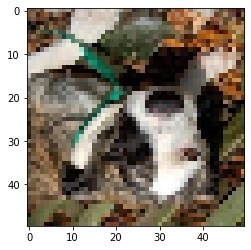

In [21]:
plt.imshow(np.flip(np.array(train_fliped_data2.loc[1]).reshape(50,50,3),2))

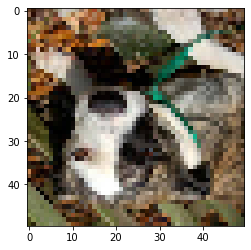

In [22]:
plt.imshow(np.flip(np.array(train_fliped_data3.loc[1]).reshape(50,50,3),2))

In [18]:
full_train_data2 = pd.concat([train_data,train_fliped_data,train_fliped_data2,train_fliped_data3])

In [19]:
full_train_target2 = pd.concat([train_target,train_fliped_target,train_fliped_target2,train_fliped_target3])

In [28]:
sc= StandardScaler()
scaled_train2 = sc.fit_transform(full_train_data2)
scaled_test2 = sc.transform(test_data)

MemoryError: Unable to allocate 4.47 GiB for an array with shape (80000, 7500) and data type float64

In [22]:
rfc = RandomForestClassifier()
rfc.fit(full_train_data2,full_train_target2)
rfc

RandomForestClassifier()

In [23]:
y_pred = rfc.predict(test_data)

In [24]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.67      0.64      2496
           1       0.64      0.59      0.61      2504

    accuracy                           0.63      5000
   macro avg       0.63      0.63      0.63      5000
weighted avg       0.63      0.63      0.63      5000



In [25]:
metrics.accuracy_score(test_target,y_pred)

0.6296

Text(33.0, 0.5, 'Actual')

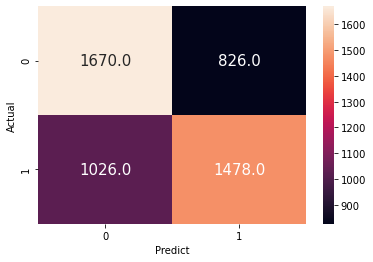

In [26]:
cm = confusion_matrix(test_target,y_pred)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [9]:
sc= StandardScaler()
scaled_train = sc.fit_transform(X_train)
scaled_test = sc.transform(X_test)

In [10]:
rfc = RandomForestClassifier()
rfc.fit(scaled_train,y_train)
rfc

RandomForestClassifier()

In [11]:
y_pred = rfc.predict(scaled_test)

In [12]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68      3149
           1       0.67      0.61      0.64      3101

    accuracy                           0.66      6250
   macro avg       0.66      0.66      0.66      6250
weighted avg       0.66      0.66      0.66      6250



In [13]:
metrics.accuracy_score(y_test,y_pred)

0.65776

In [14]:
xg = XGBClassifier(use_label_encoder=False)

In [15]:
xg = RandomForestClassifier()
xg.fit(scaled_train,y_train)
xg

RandomForestClassifier()

In [16]:
y_pred = xg.predict(scaled_test)

In [17]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67      3149
           1       0.66      0.61      0.64      3101

    accuracy                           0.65      6250
   macro avg       0.65      0.65      0.65      6250
weighted avg       0.65      0.65      0.65      6250

